In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def Load_csv(path,csv_filename):
    csv_path = os.path.join(path,csv_filename)
    return pd.read_csv(csv_path)

In [4]:
housing_dataset_path = 'datasets\housing'
filename = 'housing.csv'
Housing_Data = Load_csv(housing_dataset_path,filename)

In [5]:
Housing_Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
Housing_Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
Housing_Data.shape

(20640, 10)

In [8]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
np.random.seed(42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E12186C2B0>,
      dtype=object)

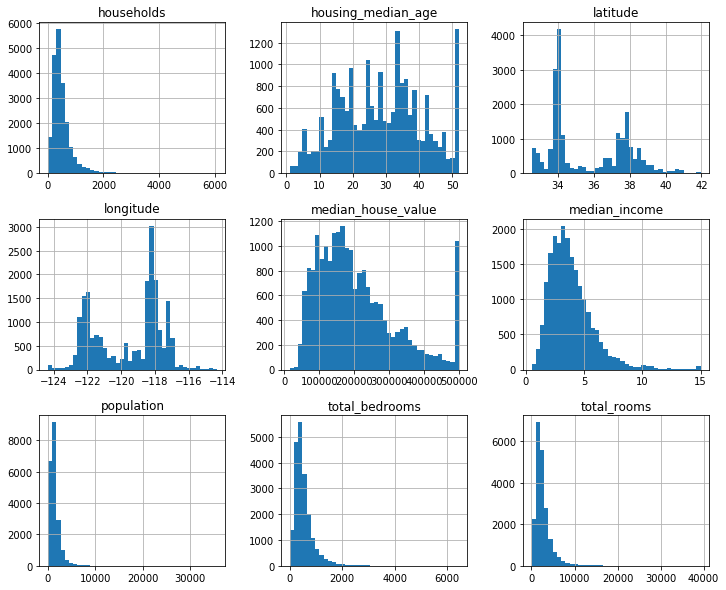

In [10]:
Housing_Data.hist(bins =40,figsize=(12,10))

Custom Spliting Function Design

In [11]:
np.random.seed(42)

In [12]:
def split_data_into_train_and_test(data,test_ratio):
    Shuffled_Indices = np.random.permutation(len(data))
    test_set_length = int(len(data) * test_ratio)
    test_shuffled_indices = Shuffled_Indices[:test_set_length]
    Train_Shuffled_indices = Shuffled_Indices[test_set_length:]
    return data.iloc[Train_Shuffled_indices],data.iloc[test_shuffled_indices]

In [14]:
Train_Set_from_Numpy_Custom_Split,Test_Set_from_Numpy_Custom_Split = split_data_into_train_and_test(Housing_Data,0.2)

In [15]:
print(len(Train_Set_from_Numpy_Custom_Split),len(Test_Set_from_Numpy_Custom_Split))

16512 4128


In [16]:
import hashlib
def test_data_check(identifier,test_ratio,hash = hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1]< 256* test_ratio

There is no Unique Identifer in the housing Data ...So For unique identifer we can combine some columns to identify a record...
In this i added a column name Index to identify a record

In [24]:
Housing_Data_with_Identifier = Housing_Data.reset_index()
Housing_Data_with_Identifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
index                 20640 non-null int64
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [23]:
def split_into_train_and_test_by_id(test_ratio,data,Unique_column_name):
    ids = data[Unique_column_name]
    In_Test_Set = ids.apply(lambda x : test_data_check(x,test_ratio))
    return data[~In_Test_Set],data[In_Test_Set]

In [25]:
Unique_Column = 'index'
Train_data_from_custom_split_function_with_unique_identifier,Test_data_from_custom_split_function_with_unique_identifier = split_into_train_and_test_by_id(0.2,Housing_Data_with_Identifier,Unique_Column)

In [26]:
Train_data_from_custom_split_function_with_unique_identifier.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [27]:
print(len(Train_data_from_custom_split_function_with_unique_identifier),len(Test_data_from_custom_split_function_with_unique_identifier))

16362 4278


SKLEARN predefined function for splitting Data

In [28]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(Housing_Data,test_size =0.2,random_state=42)

In [29]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


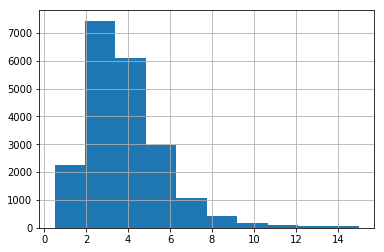

In [30]:
Housing_Data['median_income'].hist()

In [32]:
Housing_Data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

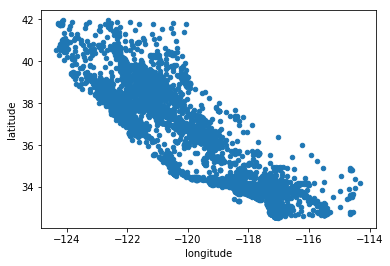

In [38]:
Housing_Data.plot(kind='scatter',x = 'longitude',y ='latitude')
plt.savefig('Bad_visualization-longitude vs latitude')

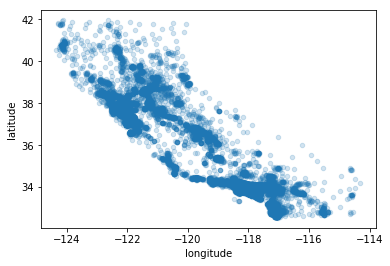

In [39]:
Housing_Data.plot(kind='scatter',x = 'longitude',y ='latitude',alpha =0.2)
plt.savefig('Good_visualization-longitude vs latitude')

In [40]:
Housing_Data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


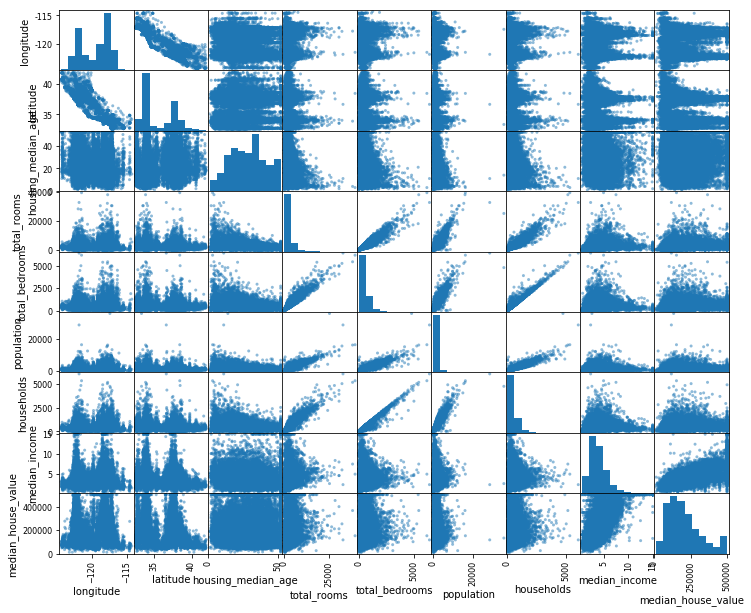

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(Housing_Data,figsize=(12,10))
plt.savefig('Correlation_of_Attributes')

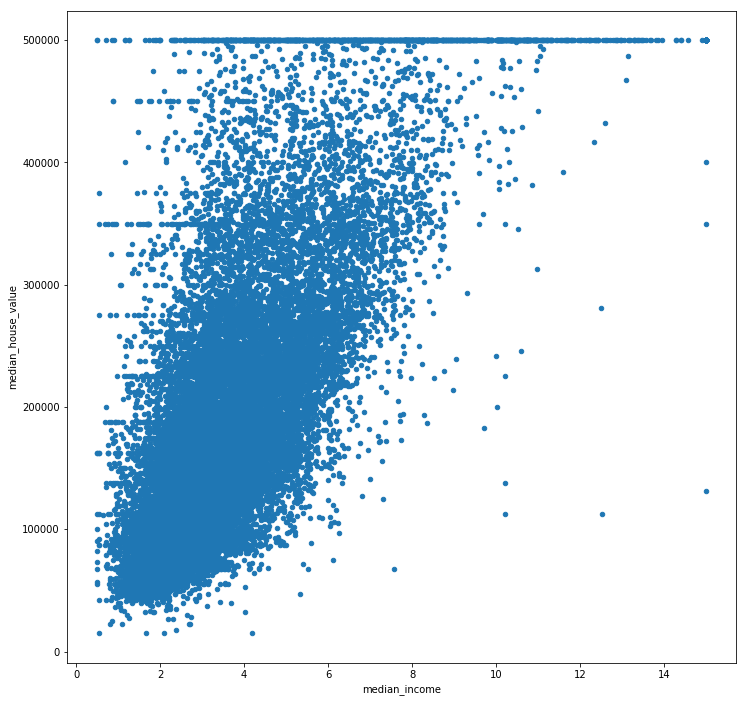

In [44]:
Housing_Data.plot(kind='scatter',x='median_income',y ='median_house_value',figsize=(12,12))
plt.savefig('Median_Income vs Median House Value')

In [47]:
Correation_matrix = Housing_Data.corr()
Correation_matrix['median_house_value'].sort_values(ascending= True)

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [48]:
Housing_Data_Features = Housing_Data.drop('median_house_value',axis = 1)
Housing_Data_Labels = Housing_Data['median_house_value']

In [51]:
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(Housing_Data.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]
from sklearn.base import BaseEstimator,TransformerMixin
class Composite_Attribute_Adder(BaseEstimator,TransformerMixin):
    def __init__(self,Add_Bedrooms_Per_Household):
        self.Add_Bedrooms_Per_Household = Add_Bedrooms_Per_Household
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        Rooms_per_Household = X[:,rooms_ix]/X[:,household_ix]
        Population_per_Household = X[:,population_ix]/X[:,household_ix]
        if self.Add_Bedrooms_Per_Household:
            Bedrooms_per_Room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,Rooms_per_Household,Population_per_Household,Bedrooms_per_Room]
        else:
            return np.c_[X,Rooms_per_Household,Population_per_Household]

In [52]:
Attribute_Adder = Composite_Attribute_Adder(Add_Bedrooms_Per_Household=False)
Housing_Data_With_Extra_Attributes = Attribute_Adder.transform(Housing_Data.values)

In [54]:
Housing_Data_With_Extra_Attributes.shape

(20640, 12)

In [55]:
Housing_Data.shape

(20640, 10)

Alternatively, you can use Scikit-Learn's FunctionTransformer class that lets you easily create a transformer based on a transformation function

In [56]:
from sklearn.preprocessing import FunctionTransformer
def Add_Extra_Attributes(X,Add_Extra_Attributes =True):
    Rooms_per_Household = X[:,rooms_ix]/X[:,household_ix]
    Population_per_Household = X[:,population_ix]/X[:,household_ix]
    if Add_Extra_Attributes:
        Bedrooms_per_Room = X[:,bedrooms_ix]/X[:,rooms_ix]
        return np.c_[X,Rooms_per_Household,Population_per_Household,Bedrooms_per_Room]
    else:
        return np.c_[X,Rooms_per_Household,Population_per_Household]
    

In [57]:
Attribute_Adder = FunctionTransformer(Add_Extra_Attributes,validate=False,kw_args={'Add_Extra_Attributes':False})
Housing_Data_with_Extra_Attributes_from_Function_Transformer = Attribute_Adder.transform(Housing_Data.values)

In [58]:
Housing_Data_with_Extra_Attributes_from_Function_Transformer.shape

(20640, 12)

In [59]:
Housing_Data_With_Extra_Attributes.shape

(20640, 12)

In [60]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator,TransformerMixin
class Label_Binarizer(BaseEstimator,TransformerMixin):
    def __init__(self,*args,**kwargs):
        self.encoder = LabelBinarizer(*args,**kwargs)
    def fit(self,X,y=0):
        self.encoder.fit(X)
        return self
    def transform(self,X,y=0):
        return self.encoder.transform(X)

In [61]:
Housing_Data_with_Numerical_Attrbutes = Housing_Data.drop(['ocean_proximity','median_house_value'],axis =1)

In [62]:
Housing_Data_with_Numerical_Attrbutes_List = list(Housing_Data_with_Numerical_Attrbutes)

In [66]:
Housing_Data_categorical_Column_Name = ['ocean_proximity']
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import Imputer,StandardScaler

In [67]:
Numerical_Data_Preprocessing_Pipeline = Pipeline([('Selector',DataFrameSelector(Housing_Data_with_Numerical_Attrbutes_List)),('Imputer',Imputer(strategy='median')),('Standardization',StandardScaler())])

In [68]:
Categorical_Data_Preprocessing_Pipeline = Pipeline([('Selector',DataFrameSelector(Housing_Data_categorical_Column_Name)),('Categorical_Encoding',Label_Binarizer())])

In [69]:
Housing_Data_Features = Housing_Data.drop('median_house_value',axis =1)

In [70]:
Housing_Data_Labels = Housing_Data['median_house_value']

In [71]:
Total_Pipeline = FeatureUnion(transformer_list=[('Numerical_Data_Handling',Numerical_Data_Preprocessing_Pipeline),('Category_Data_handling',Categorical_Data_Preprocessing_Pipeline)])

In [72]:
Preprocessed_Housing_Data_Features = Total_Pipeline.fit_transform(Housing_Data_Features)

In [73]:
Preprocessed_Housing_Data_Features

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
Preprocessed_Housing_Data_Features.shape

(20640, 13)

In [76]:
#Housing_Data_Labels
Housing_Data_Labels_Handling_Pipeline = Pipeline([('Imputer',Imputer(strategy='median')),('Standardization',StandardScaler())])

In [78]:
Preprocessed_Housing_Data_Labels = Housing_Data_Labels_Handling_Pipeline.fit_transform(Housing_Data_Labels.values.reshape(-1,1))

In [79]:
Preprocessed_Housing_Data_Labels

array([[ 2.12963148],
       [ 1.31415614],
       [ 1.25869341],
       ...,
       [-0.99274649],
       [-1.05860847],
       [-1.01787803]])

In [80]:
Preprocessed_Housing_Data_Labels.shape

(20640, 1)

Training and Predicting The Data

In [81]:
from sklearn.linear_model import LinearRegression 

In [82]:
Lin_Regressor = LinearRegression()

In [83]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(Preprocessed_Housing_Data_Features,Preprocessed_Housing_Data_Labels,test_size= 0.2,random_state = 42)

In [90]:
X_train.shape

(16512, 13)

In [91]:
X_test.shape

(4128, 13)

In [92]:
Lin_Regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
Y_Pred_Linear_Regression = Lin_Regressor.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
MSE_Linear_Regression = mean_squared_error(Y_test,Y_Pred_Linear_Regression)

In [96]:
MSE_Linear_Regression

0.368628712025002

what if we used Income which is not Stanardised???????

In [97]:
Linear_Regression = LinearRegression()

In [98]:
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(Preprocessed_Housing_Data_Features,Housing_Data_Labels,test_size= 0.2,random_state = 42)

In [99]:
Linear_Regression.fit(X_train_1,Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
Y_Pred_Linear_Regression_Labels_Not_Standardised  = Linear_Regression.predict(X_test_1)

In [102]:
MSE_Linear_Regression_Labels_Not_Standardised = mean_squared_error(Y_test_1,Y_Pred_Linear_Regression_Labels_Not_Standardised)

In [103]:
MSE_Linear_Regression_Labels_Not_Standardised

4908476721.156614

In [104]:
RMSE_Linear_Regression_Labels_Not_Standardised = np.sqrt(MSE_Linear_Regression_Labels_Not_Standardised)

In [105]:
RMSE_Linear_Regression_Labels_Not_Standardised

70060.52184473517

What if we Use SVR ????????????

In [106]:
from sklearn.svm import SVR

In [107]:
State_vector_Regressor = SVR()

In [108]:
State_vector_Regressor.fit(X_train_1,Y_train_1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [109]:
Y_Pred_SVR_Labels_Not_Standardised = State_vector_Regressor.predict(X_test_1)

In [110]:
MSE_SVR_Labels_Not_Standardised = mean_squared_error(Y_test_1,Y_Pred_SVR_Labels_Not_Standardised)

In [111]:
MSE_SVR_Labels_Not_Standardised

13670497423.419044

In [112]:
RMSE_SVR_Labels_Not_Standardised = np.sqrt(MSE_SVR_Labels_Not_Standardised)

In [113]:
RMSE_SVR_Labels_Not_Standardised

116920.90242304429

What if DecisionTreeRegressor????????????

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
DecisionTreeRegressor = DecisionTreeRegressor()

In [116]:
DecisionTreeRegressor.fit(X_train_1,Y_train_1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [117]:
Y_Pred_Tree_Labels_Not_Standardised = DecisionTreeRegressor.predict(X_test_1)

In [118]:
MSE_Tree_Labels_Not_Standardised = mean_squared_error(Y_test_1,Y_Pred_Tree_Labels_Not_Standardised)

In [119]:
RMSE_Tree_Labels_Not_Standardised = np.sqrt(MSE_Tree_Labels_Not_Standardised)

In [120]:
RMSE_Tree_Labels_Not_Standardised

68271.42291624278

What if RandomForestRegressor????????????

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
RFR = RandomForestRegressor()

In [123]:
RFR.fit(X_train_1,Y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
Y_pred_RFR_Labels_Not_Standardised = RFR.predict(X_test_1)

In [125]:
MSE_RFR_Labels_Not_Standardised = mean_squared_error(Y_test_1,Y_pred_RFR_Labels_Not_Standardised)

In [126]:
MSE_RFR_Labels_Not_Standardised

2557850608.9805717

In [127]:
RMSE_RFR_Labels_Not_Standardised = np.sqrt(MSE_RFR_Labels_Not_Standardised)

In [128]:
RMSE_RFR_Labels_Not_Standardised

50575.1975673904

Tuning the Model ----Finding the best Parameters for the Algorithm

In [131]:
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
svr = SVR()
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
rft = RandomForestRegressor()

In [132]:
Scores = cross_val_score(lin_reg,Preprocessed_Housing_Data_Features,Housing_Data_Labels,scoring='neg_mean_squared_error',cv =10)
lin_reg_rmse = np.sqrt(-Scores)

In [134]:
def Display(data):
    print('RMSE Scores',np.int64(lin_reg_rmse))
    print('Mean of Scores',lin_reg_rmse.mean())
    print('Standard deviation of Scores',lin_reg_rmse.std())
Display(Scores)

RMSE Scores [            85477             59711             88064             62773
 11113085532011922             69657             52473             91548
             78177             53543]
Mean of Scores 1111308553265335.0
Standard deviation of Scores 3333925659582196.0


In [135]:
Scores = cross_val_score(svr,Preprocessed_Housing_Data_Features,Housing_Data_Labels,scoring='neg_mean_squared_error',cv =10)
svr_rmse = np.sqrt(-Scores)
Display(Scores)

RMSE Scores [            85477             59711             88064             62773
 11113085532011922             69657             52473             91548
             78177             53543]
Mean of Scores 1111308553265335.0
Standard deviation of Scores 3333925659582196.0


In [136]:
Display(Scores)

RMSE Scores [            85477             59711             88064             62773
 11113085532011922             69657             52473             91548
             78177             53543]
Mean of Scores 1111308553265335.0
Standard deviation of Scores 3333925659582196.0


In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
param_grid ={'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}

In [140]:
rfr = RandomForestRegressor(random_state=42)

In [141]:
grid_search = GridSearchCV(rfr,param_grid,cv =5,scoring='neg_mean_squared_error',return_train_score=True)

In [142]:
grid_search.fit(Preprocessed_Housing_Data_Features,Housing_Data_Labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=({'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}),
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [143]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [144]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [147]:
#svr = SVR()
#from sklearn.tree import DecisionTreeRegressor
#dt = DecisionTreeRegressor()
#grid_search = GridSearchCV(dt,param_grid,cv =5,scoring='neg_mean_squared_error',return_train_score=True)
#grid_search.fit(Preprocessed_Housing_Data_Features,Housing_Data_Labels)

In [148]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
from scipy.stats import randint

In [150]:
param_distribs = {'n_estimators':randint(low =1,high =200),'max_features':randint(low =1,high =8)}
forest_regression = RandomForestRegressor(random_state=42)
randomized_search = RandomizedSearchCV(forest_regression,param_distributions=param_distribs,n_iter=10,cv =5,scoring= 'neg_mean_squared_error',random_state=42)
randomized_search.fit(Preprocessed_Housing_Data_Features,Housing_Data_Labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E1285E65F8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E1285E6748>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [151]:
randomized_search.best_params_

{'max_features': 3, 'n_estimators': 150}

In [152]:
cvres = randomized_search.cv_results_

In [154]:
cvres

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([11.04141874,  0.57598252,  2.05585632,  0.83589034,  6.49811368,
         1.9768476 ,  2.25793056,  3.84144115,  4.12265038,  0.08543005]),
 'std_fit_time': array([1.22685812, 0.02849521, 0.12373007, 0.06619353, 0.42811694,
        0.03618935, 0.05076897, 0.14813806, 0.18811042, 0.00277536]),
 'mean_score_time': array([0.12065854, 0.00812106, 0.04131618, 0.01283412, 0.06640153,
        0.04072671, 0.04773445, 0.05705409, 0.08914018, 0.00190597]),
 'std_score_time': array([0.03238727, 0.00049138, 0.00354065, 0.00161391, 0.00906888,
        0.0027858 , 0.00303428, 0.00590208, 0.00597725, 0.00020089]),
 'param_max_features': masked_array(data=[7, 5, 3, 5, 7, 3, 3, 5, 3, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[180, 15, 72, 21, 122, 75, 88, 100, 150, 2],
              mask=[False, False, False, False

In [155]:
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

73644.49683826274 {'max_features': 7, 'n_estimators': 180}
75638.48031963252 {'max_features': 5, 'n_estimators': 15}
71988.89282659511 {'max_features': 3, 'n_estimators': 72}
74011.88212822798 {'max_features': 5, 'n_estimators': 21}
73511.17561617067 {'max_features': 7, 'n_estimators': 122}
71997.62355471734 {'max_features': 3, 'n_estimators': 75}
71837.30214394239 {'max_features': 3, 'n_estimators': 88}
71934.30762761095 {'max_features': 5, 'n_estimators': 100}
71614.6478783618 {'max_features': 3, 'n_estimators': 150}
91668.04102520342 {'max_features': 5, 'n_estimators': 2}


In [157]:
#Feature_Importance = grid_search.best_estimator_.feature_importance_

In [158]:
Full_Pipeline_with_Prediction = Pipeline([('Preparation',Total_Pipeline),('Linear_Regression',LinearRegression())])

In [159]:
from sklearn.externals import joblib

In [160]:
joblib.dump(Full_Pipeline_with_Prediction,'Pipeline_with_Linear_Regression.pkl')

['Pipeline_with_Linear_Regression.pkl']

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
param_grid = {'kernel':['linear'],'C':[10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},{'kernel':['rbf'],'C':[1.0, 3.0, 10., 30., 100., 300., 1000.0],'gamma':[0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}

In [163]:
svm_reg = SVR()

In [164]:
grid_search = GridSearchCV(svm_reg,param_grid,cv=5,scoring='neg_mean_squared_error',verbose =2,n_jobs=4)

In [165]:
grid_search.fit(Preprocessed_Housing_Data_Features,Housing_Data_Labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 24.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 37.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=({'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]}, {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [166]:
grid_search.best_params_

{'C': 300.0, 'kernel': 'linear'}

In [167]:
grid_search.best_score_

-5619579157.183697

In [168]:
np.sqrt(-grid_search.best_score_.mean())

74963.85233686764

In [169]:
grid_search.best_score_

-5619579157.183697